# Решающие деревья

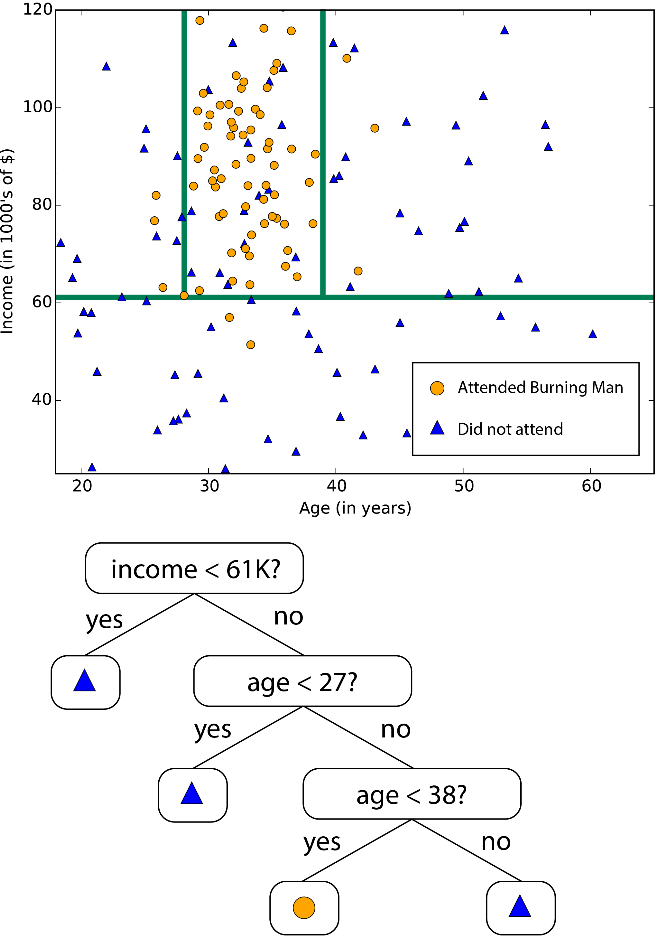

*Source: https://www.upnxtblog.com/index.php/2017/12/06/17-machine-learning-algorithms-that-you-should-know/*

Сами по себе решающие деревья используются в машинном обучении относительно редко, однако очень распространены методы, основанные на их композиции - ансамблях (Random Forest, XGBoost, LightGBM).

## Линейные модели или решающие деревья?

- когда данные хорошо линейно разделимы, линейная модель лучше

- когда данные плохо линейно разделимы (много сложных нелинейных зависимостей в данных), модель, основанная на решающих деревьях, лучше

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
plt.rcParams['figure.figsize'] = (11, 6.5)

<function matplotlib.pyplot.show(close=None, block=None)>

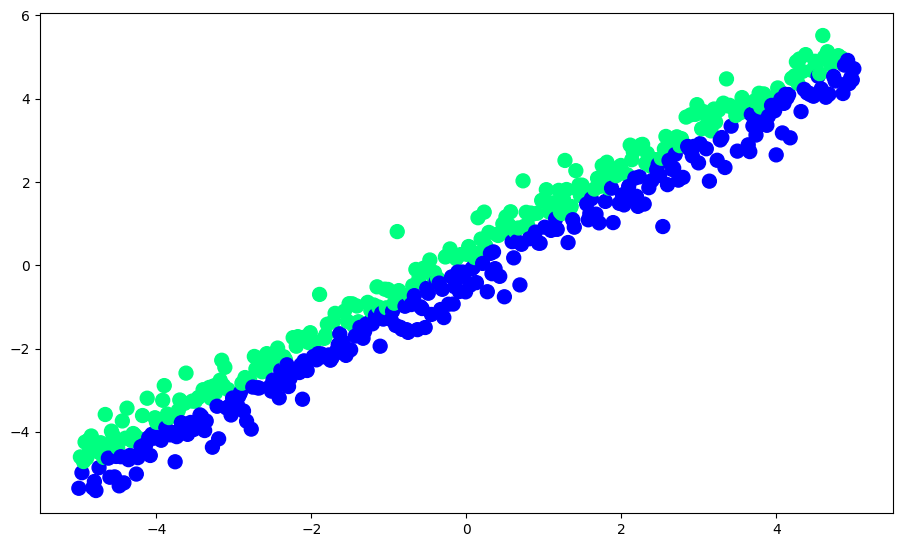

In [6]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5,5,500)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_lr, y_test)

0.992

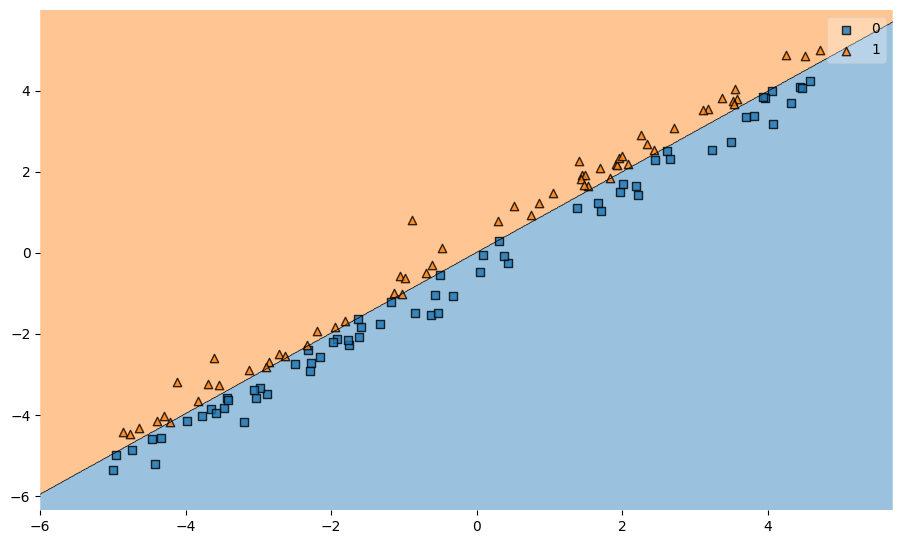

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, lr)

plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [12]:
accuracy_score(y_pred_dt, y_test)

0.864

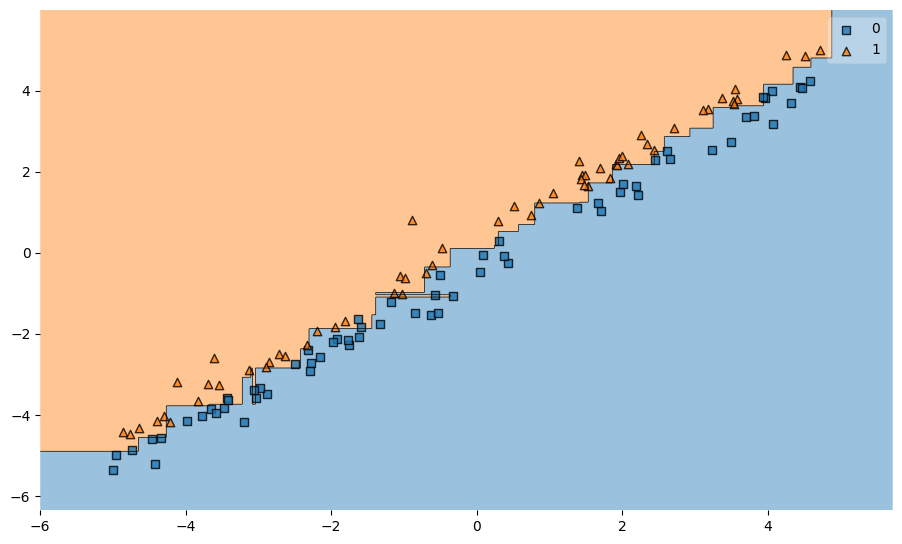

In [13]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

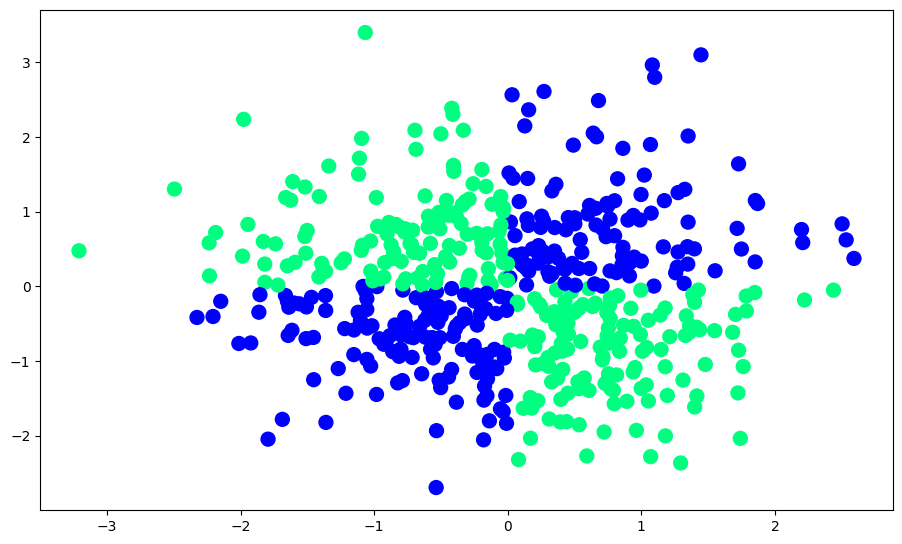

In [14]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [16]:
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_pred_lr, y_test)

0.392

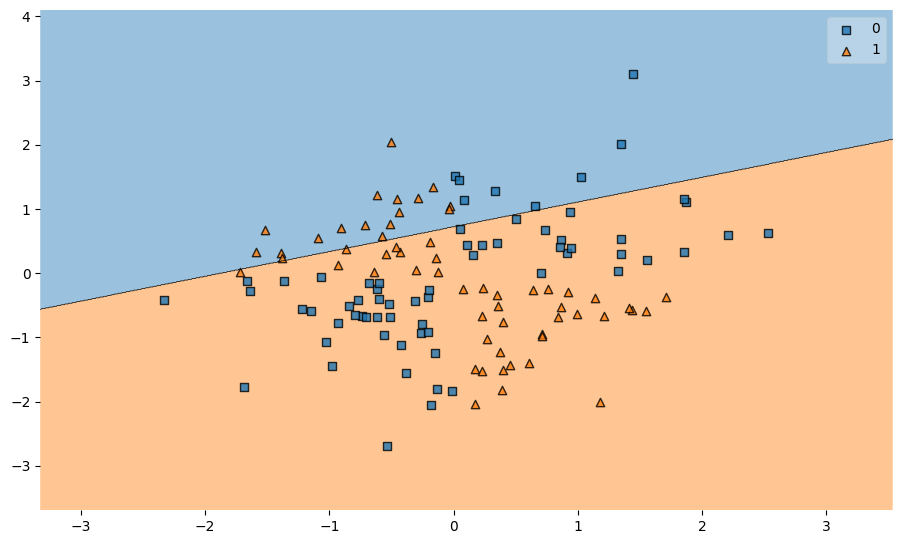

In [17]:
plot_decision_regions(X_test, y_test, lr)
plt.show()

In [18]:
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_pred_dt, y_test)

0.968

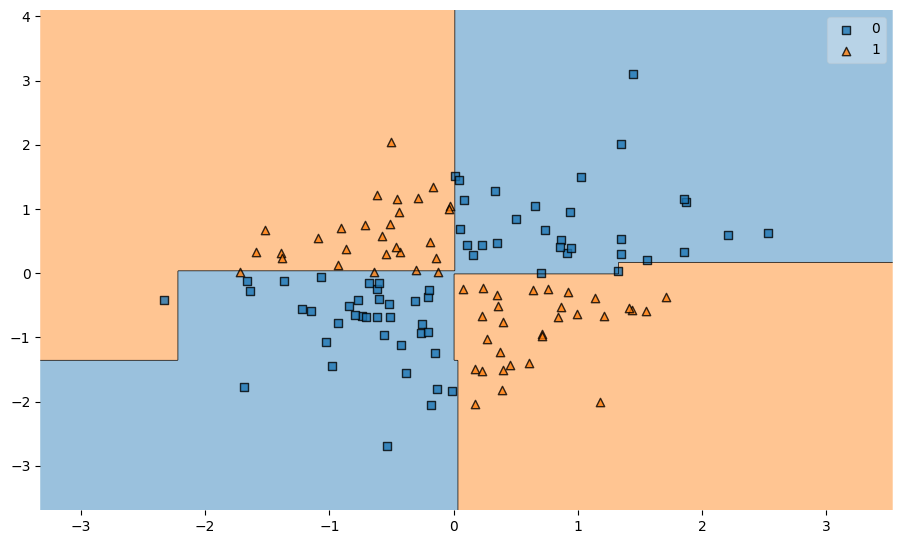

In [19]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

## Переобучение

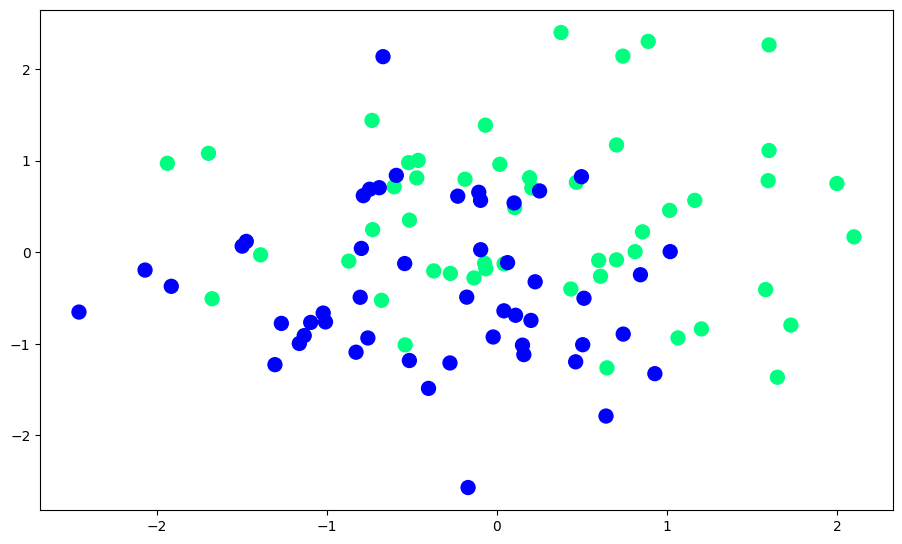

In [20]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show()

Как влияют разные значения гиперпараметров решающего дерева на его структуру?

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листовой

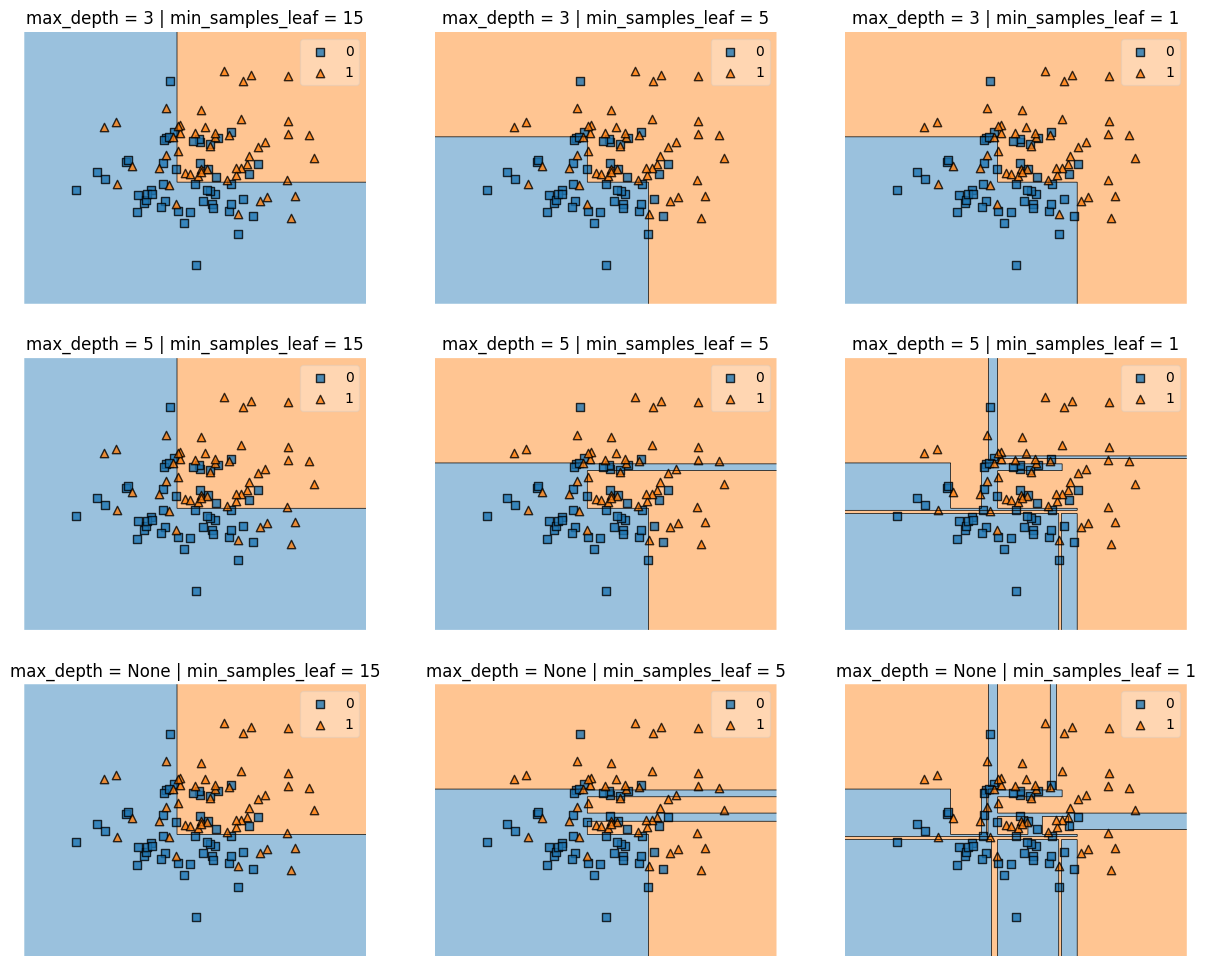

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title('max_depth = {} | min_samples_leaf = {}'.format(max_depth, min_samples_leaf))
        ax[i][j].axis('off')
        plot_decision_regions(X, y, dt, ax=ax[i][j])
plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

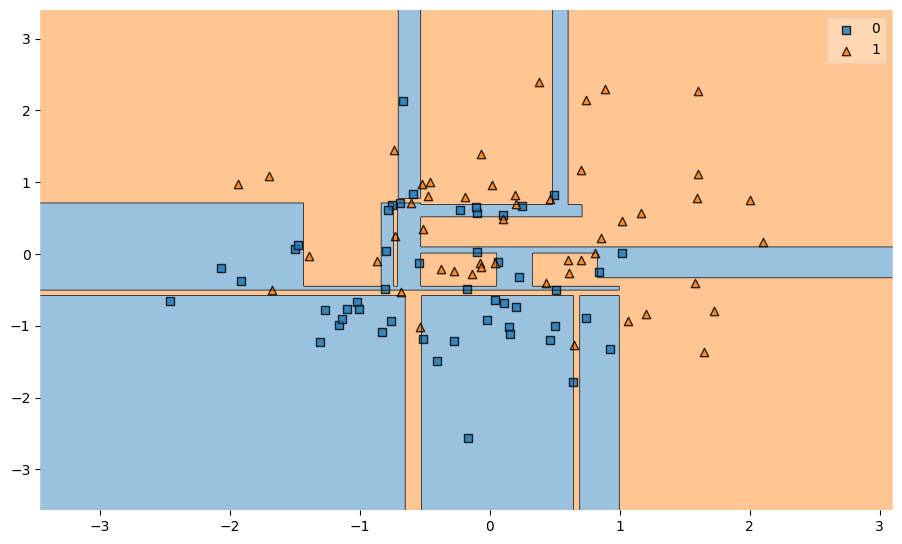

In [22]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
dt.fit(X, y)
plot_decision_regions(X, y, dt)
plt.show()

In [23]:
accuracy_score(y, dt.predict(X))

1.0

## Неустойчивость

Посмотрим, как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки исходной выборки.

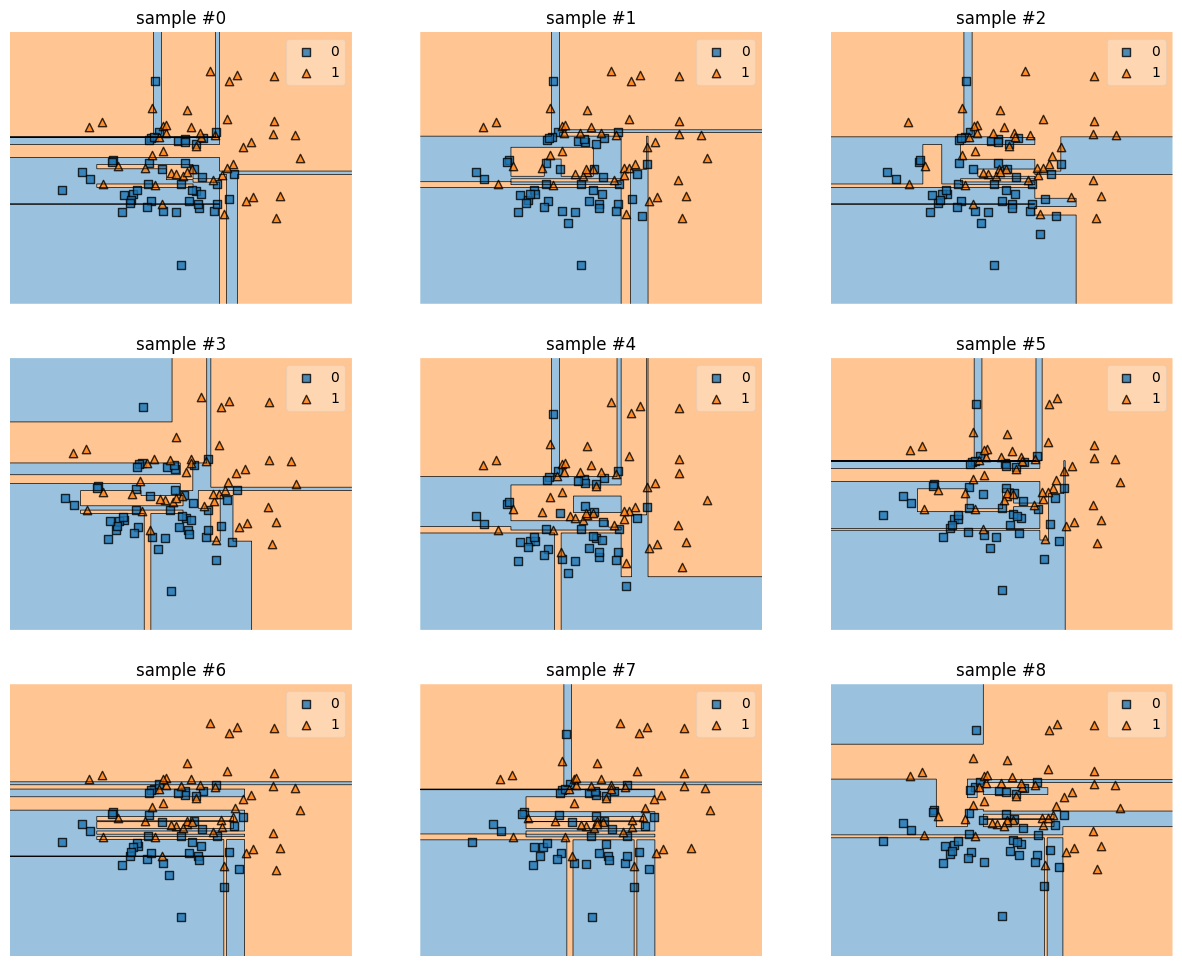

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title('sample #{}'.format(seed_idx))
        ax[i][j].axis('off')
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])
plt.show()

## Практика

Возьмем стандартный датасет со стоимостью жилья в различных районах Калифорнии в 1990 году. Датасет содержит информацию о средних ценах на жилье в районе и какие-то параметры района: средний возраст домов, среднее число комнат, население

In [25]:
import pandas as pd

In [26]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

In [27]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [28]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [29]:
X.shape

(20640, 8)

In [30]:
len(X.isna().apply(lambda x: x == True))

20640

In [31]:
X.fillna(X.mean())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [32]:
len(X.isna().apply(lambda x: x == True))

20640

In [33]:
y[:5]

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [34]:
y.shape

(20640,)

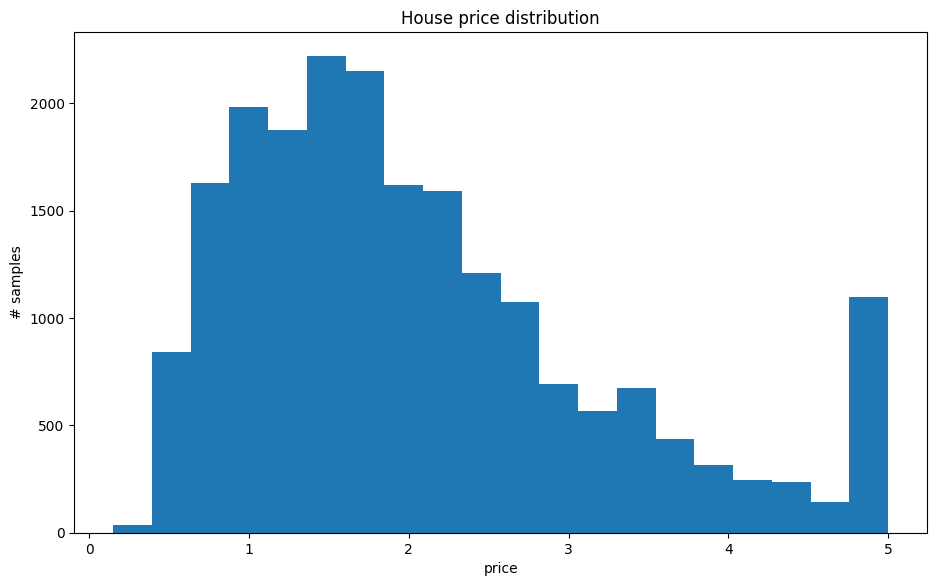

In [35]:
plt.title('House price distribution')
plt.xlabel('price')
plt.ylabel('# samples')
plt.hist(y, bins=20)
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

## Решающее дерево своими руками

$R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

$H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

_Реализуйте подсчет критерия ошибки. Для этого реализуйте функции для подсчета значения критерия информативности, а также для разбиения вершины._

In [37]:
import math

def H(R):
    std = y[R.index].var()
    return std


def split_node(R_m, feature, t):
    R_l = R_m[R_m[feature] < t]
    R_r = R_m[R_m[feature] >= t]
    return R_l, R_r

def q_error_part(R_m, R_sub):
    return len(R_sub)/len(R_m) * H(R_sub)

def q_error(R_m, feature, t):
    R_l, R_r = split_node(R_m, feature, t)
    res =  q_error_part(R_m, R_l) + q_error_part(R_m, R_r)
    if math.isnan(res):
        raise Exception(f"nan with feature {feature}\n len(R_l) = {len(R_l)}\n len(R_r) = {len(R_r)}")
    return res

_Переберите все возможные разбиения выборки по одному из признаков и постройте график критерия ошибки в зависимости от значения порога._

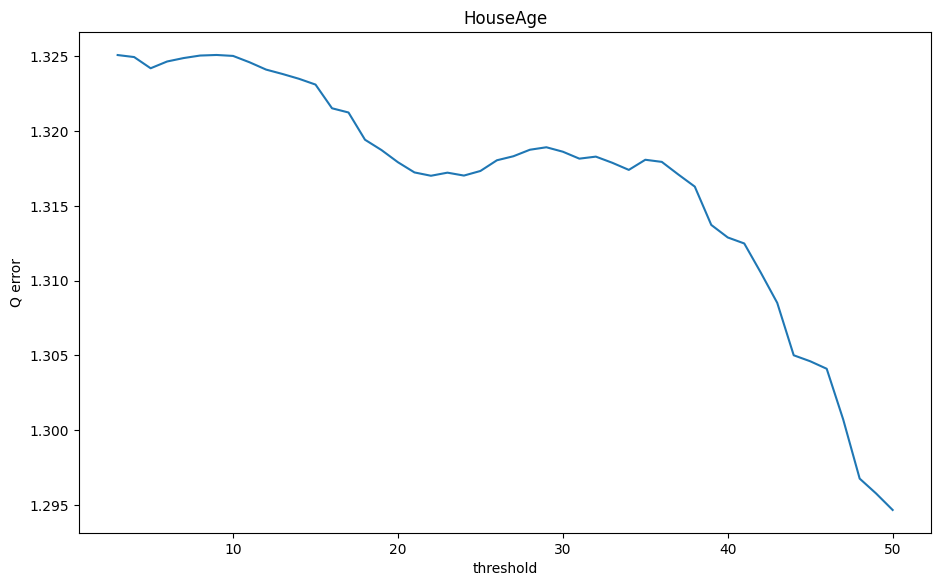

In [38]:
feature = 'HouseAge'
Q_array = []
feature_values = np.unique(X_train[feature])[2:-2]
for t in feature_values:
    q_err = q_error(X_train, feature, t)
    if math.isnan(q_err):
        raise Exception("piza")
    Q_array.append(q_err)
    
plt.plot(feature_values, Q_array)
plt.title(feature)
plt.xlabel('threshold')
plt.ylabel('Q error')
plt.show()

_Напишите функцию, находящую оптимальное разбиение данной вершины по данному признаку._

In [39]:
def get_optimal_split(R_m, feature):
    Q_array = []
    feature_values = np.unique(R_m[feature])[2:-2]
    for t in feature_values:
        Q_array.append(q_error(R_m, feature, t))
    # np.argmin(Q_array)
    opt_threshold = feature_values[np.argmin(Q_array)]
    return opt_threshold, Q_array

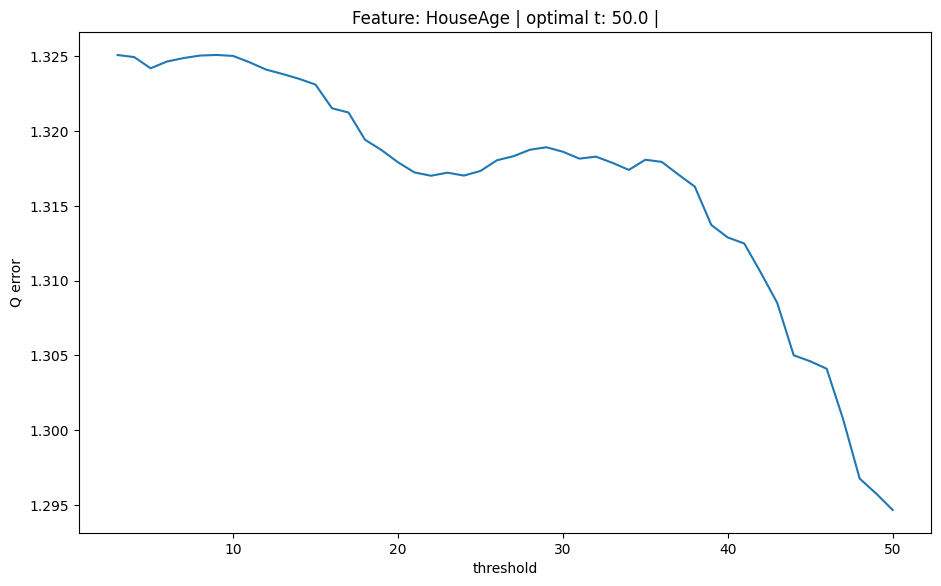

In [40]:
t, Q_array = get_optimal_split(X_train, feature)
plt.plot(np.unique(X_train[feature])[2:-2], Q_array)
plt.title(feature)
plt.title('Feature: {} | optimal t: {} |'.format(feature, t))
plt.xlabel('threshold')

plt.ylabel('Q error')
plt.show()

_Постройте графики критерия ошибки (в зависимости от количества объектов в левом поддереве) для каждого из признаков. Найдите признак, показывающий наилучшее качество. Какой это признак? Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога._

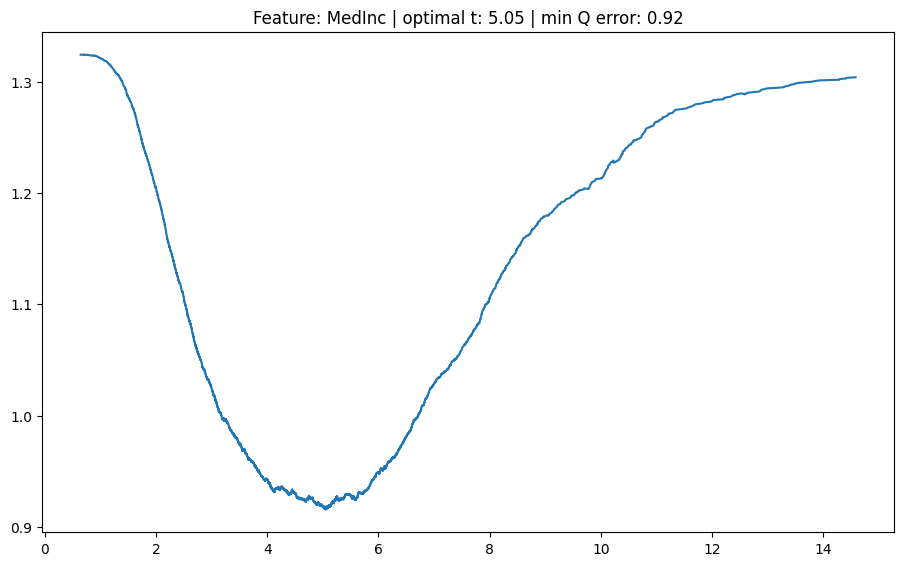

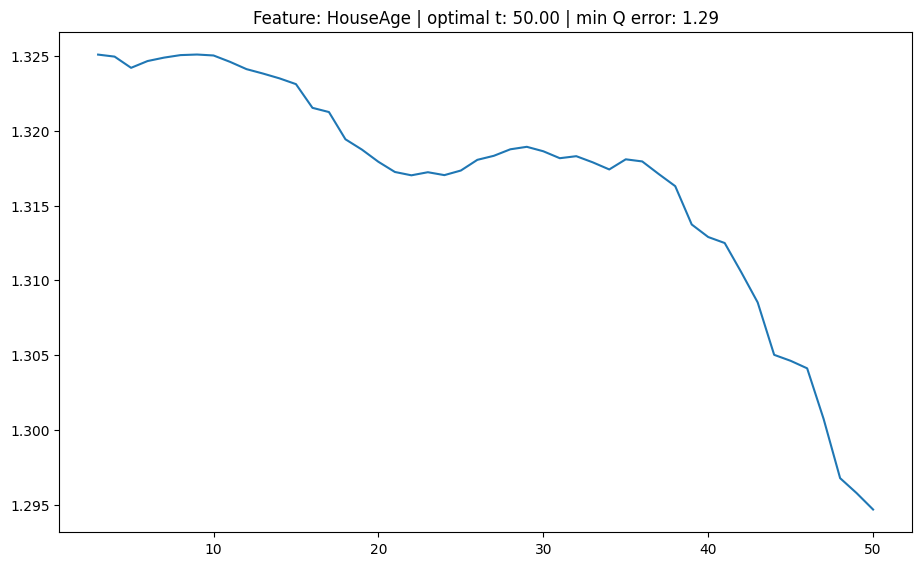

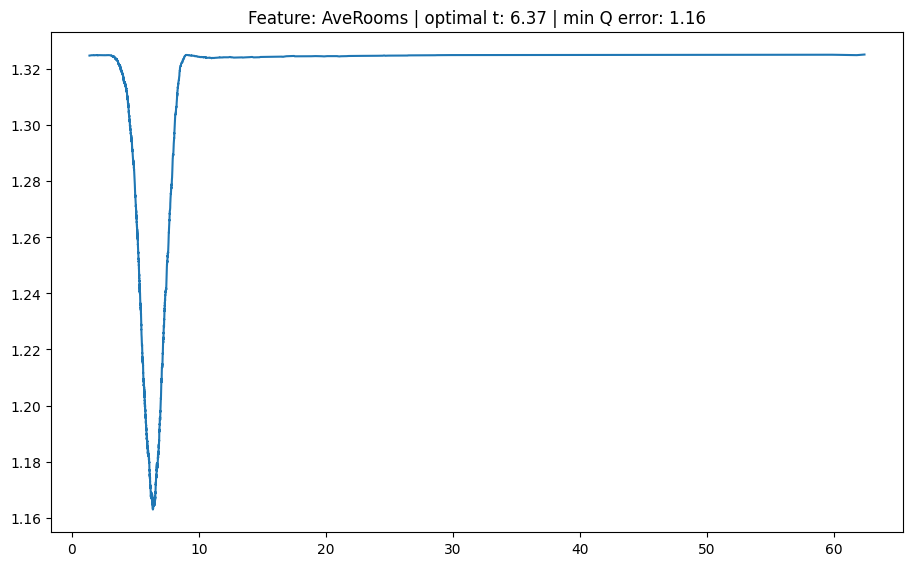

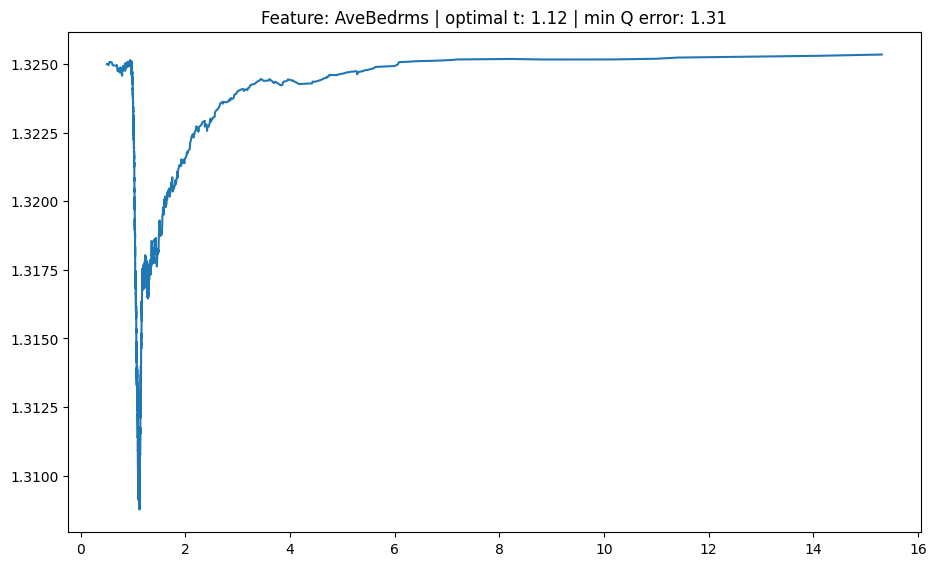

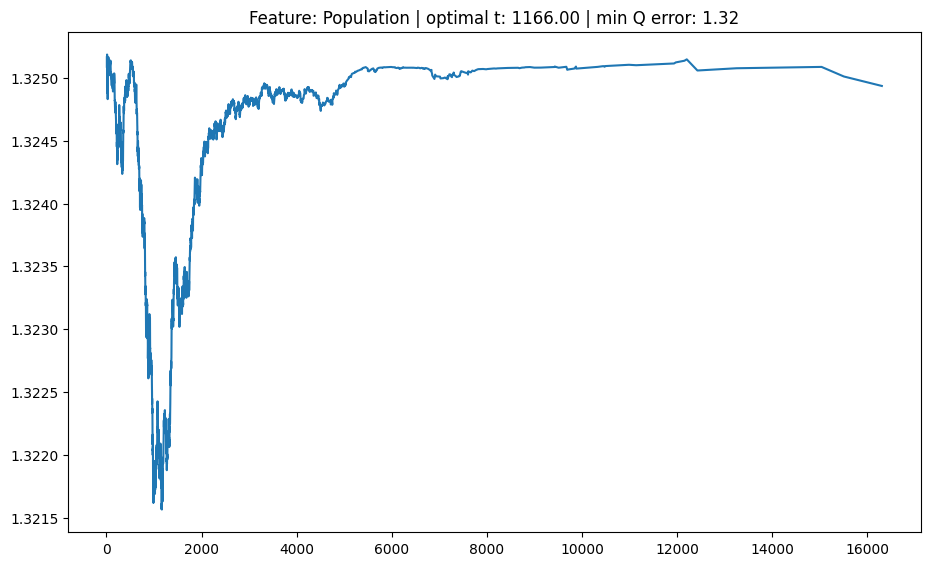

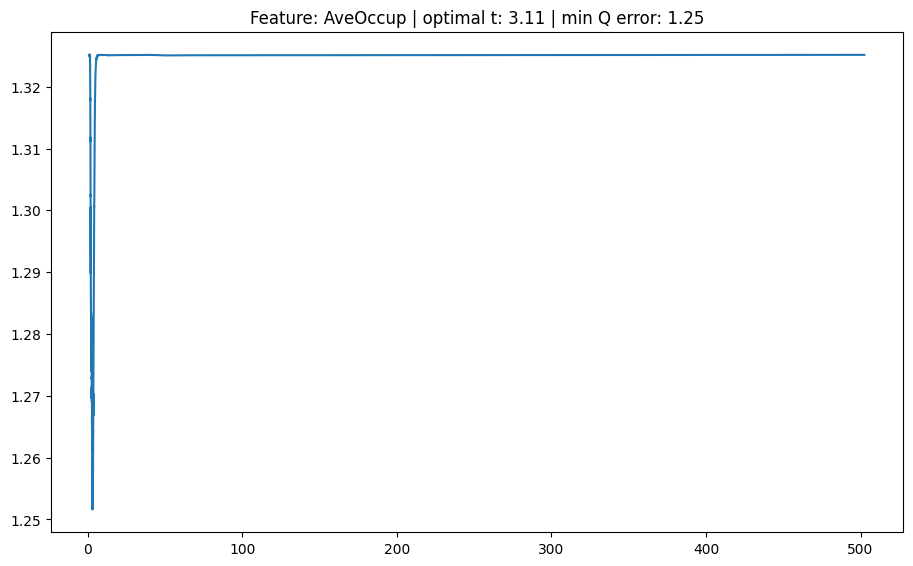

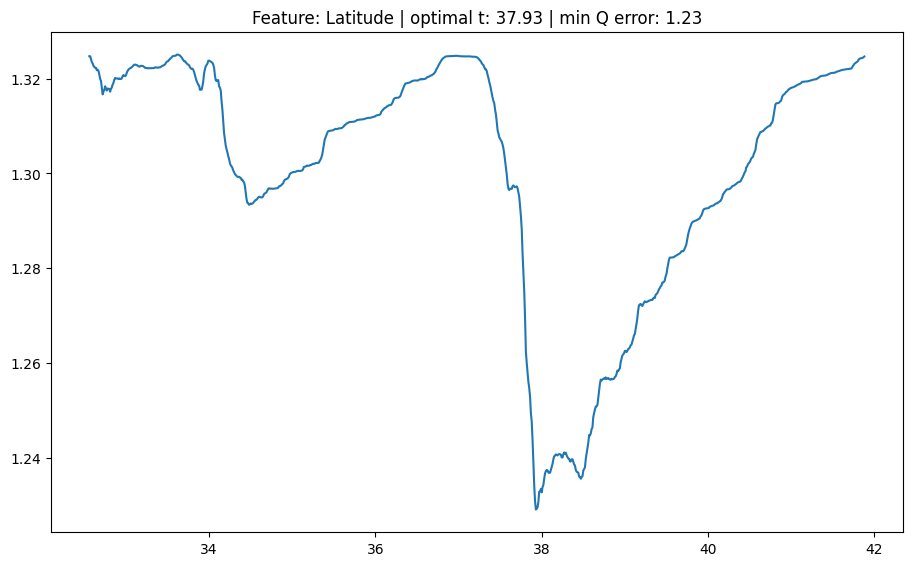

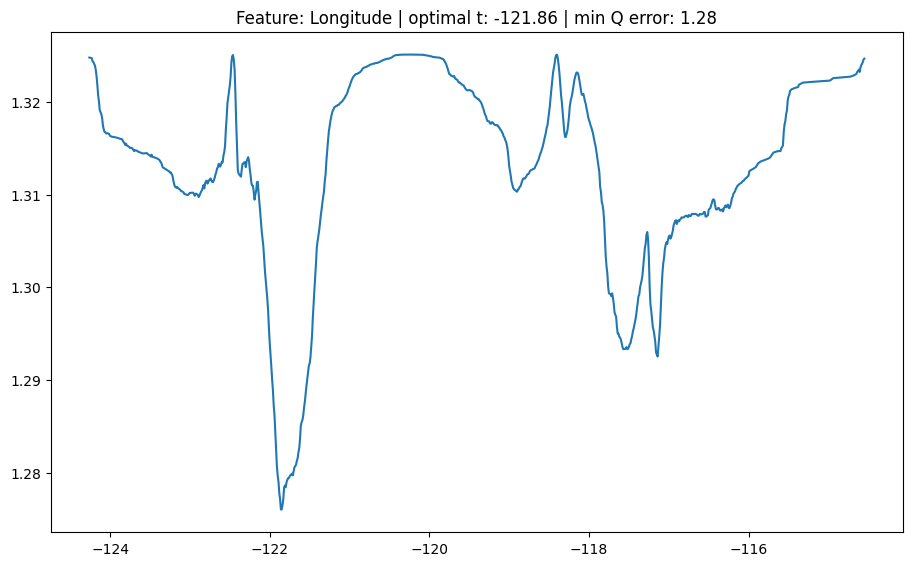

In [41]:
results = []
for f in X_train.columns:
    t, Q_array = get_optimal_split(X_train, f)
    min_error = min(Q_array)
    results.append((f, t, min_error))
    plt.figure()
    plt.title('Feature: {} | optimal t: {:.2f} | min Q error: {:.2f}'.format(f, t, min_error))
    plt.plot(np.unique(X_train[f])[2:-2], Q_array)
    plt.show()

In [42]:
results = sorted(results, key=lambda x: x[2])
results

[('MedInc', np.float64(5.0457), np.float64(0.9153642142848055)),
 ('AveRooms', np.float64(6.374545454545455), np.float64(1.1628589971272478)),
 ('Latitude', np.float64(37.93), np.float64(1.229030378207104)),
 ('AveOccup', np.float64(3.109181141439206), np.float64(1.2516106017878255)),
 ('Longitude', np.float64(-121.86), np.float64(1.2760115799735559)),
 ('HouseAge', np.float64(50.0), np.float64(1.2946682316587061)),
 ('AveBedrms', np.float64(1.1235584843492588), np.float64(1.308769985755053)),
 ('Population', np.float64(1166.0), np.float64(1.321564360257149))]

In [43]:
pd.DataFrame(results, columns=['feature', 'optimal t', 'min Q error'])

,feature,optimal t,min Q error
0,MedInc,5.045700,0.915364
1,AveRooms,6.374545,1.162859
2,Latitude,37.930000,1.229030
3,AveOccup,3.109181,1.251611
4,Longitude,-121.860000,1.276012
5,HouseAge,50.000000,1.294668
6,AveBedrms,1.123558,1.308770
7,Population,1166.000000,1.321564


In [44]:
optimal_feature, optimal_t, optimal_error = results[6]


_Изобразите разбиение визуально. Для этого постройте диаграмму рассеяния целевой переменной в зависимости от значения найденного признака. Далее изобразите вертикальную линию, соответствующую порогу разбиения. Почему это разбиение может быть лучшим? Как вы можете интерпретировать результат?_

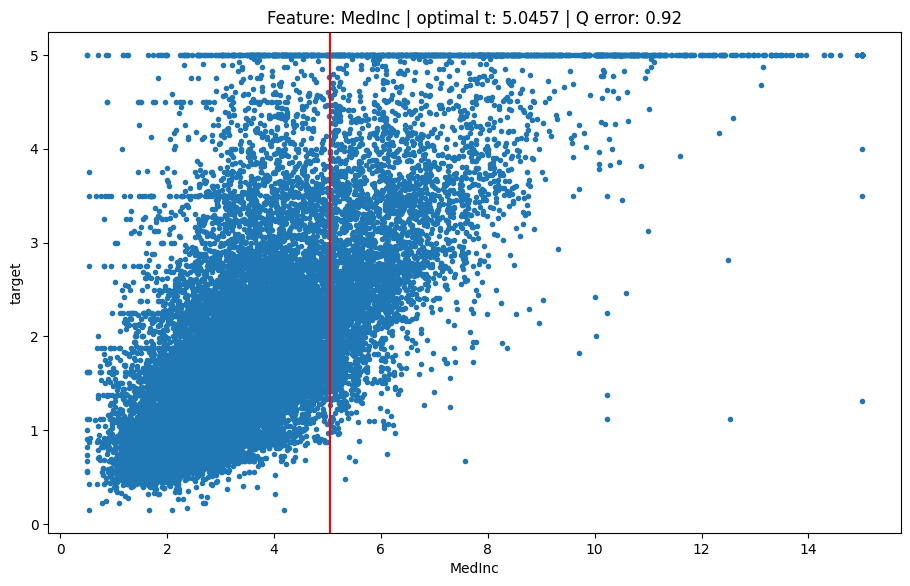

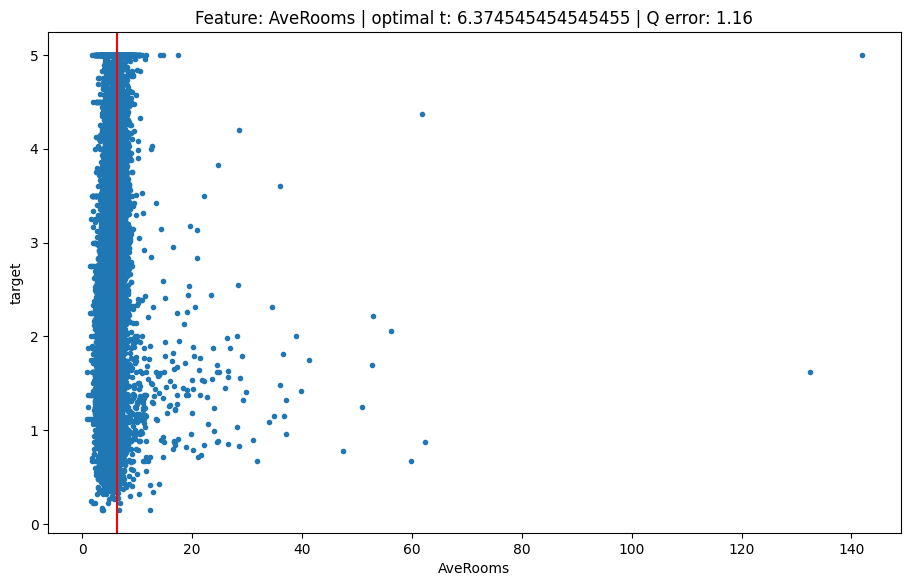

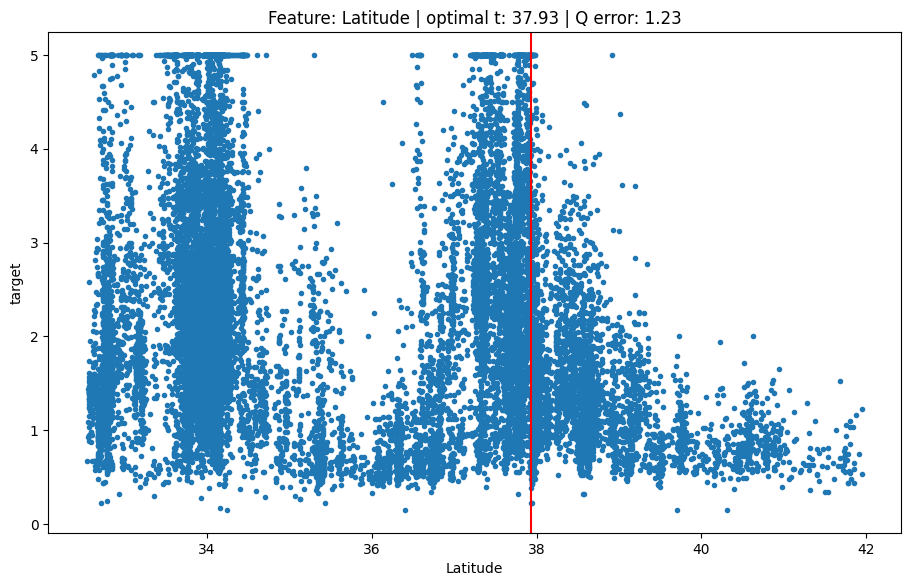

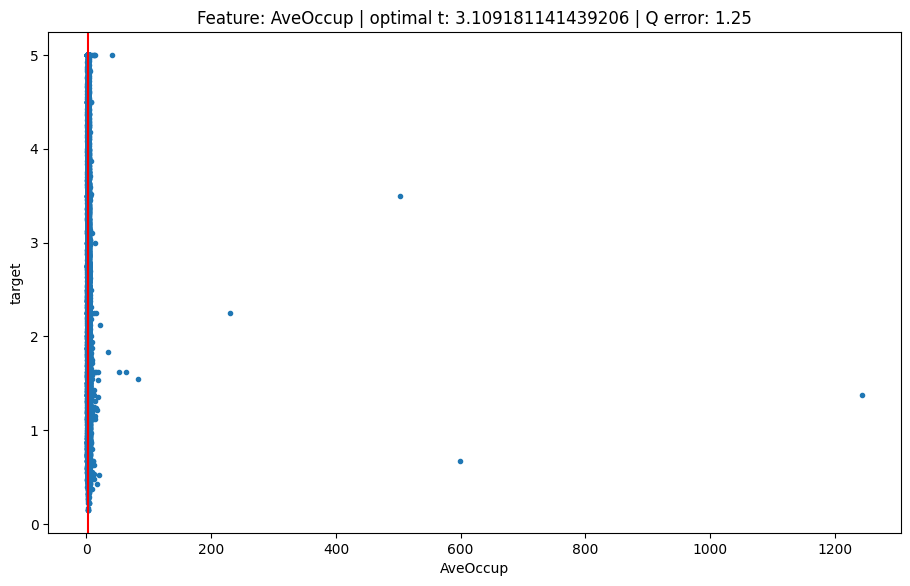

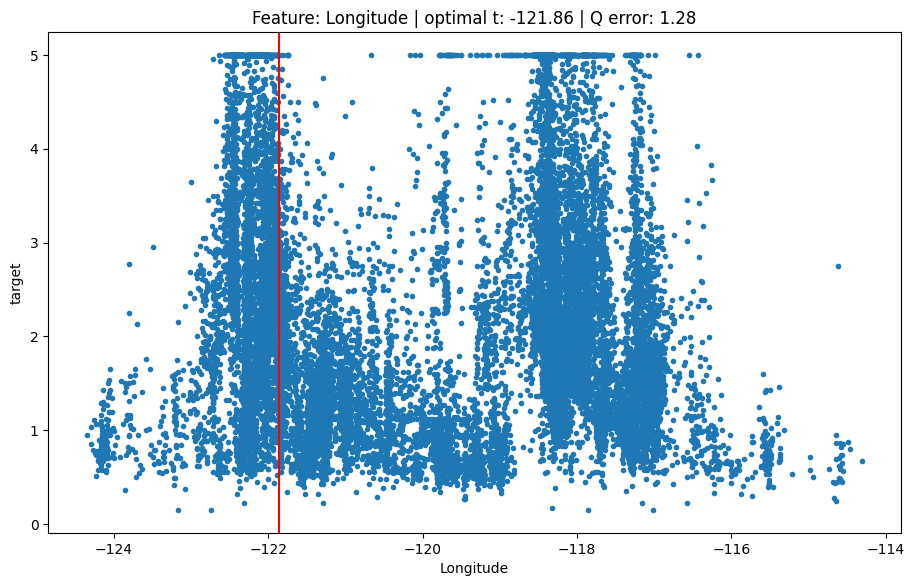

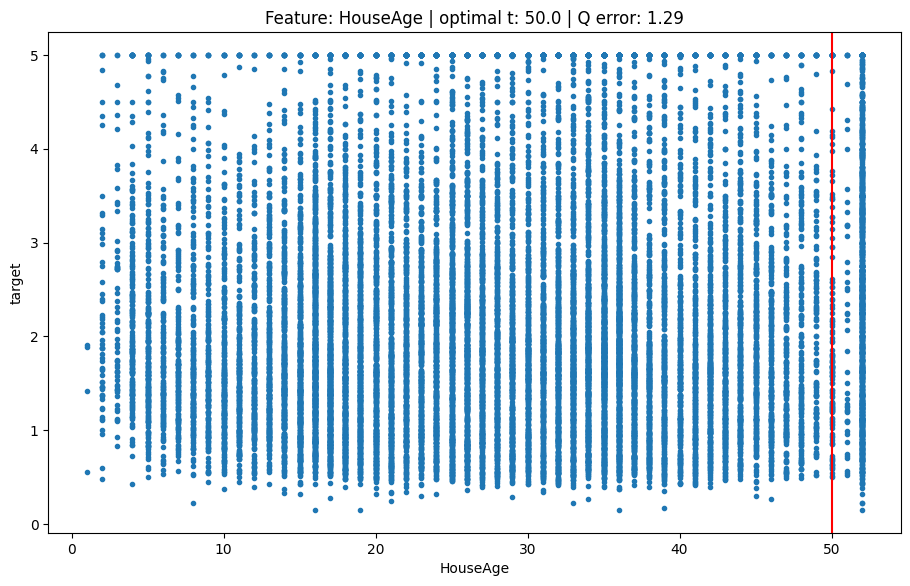

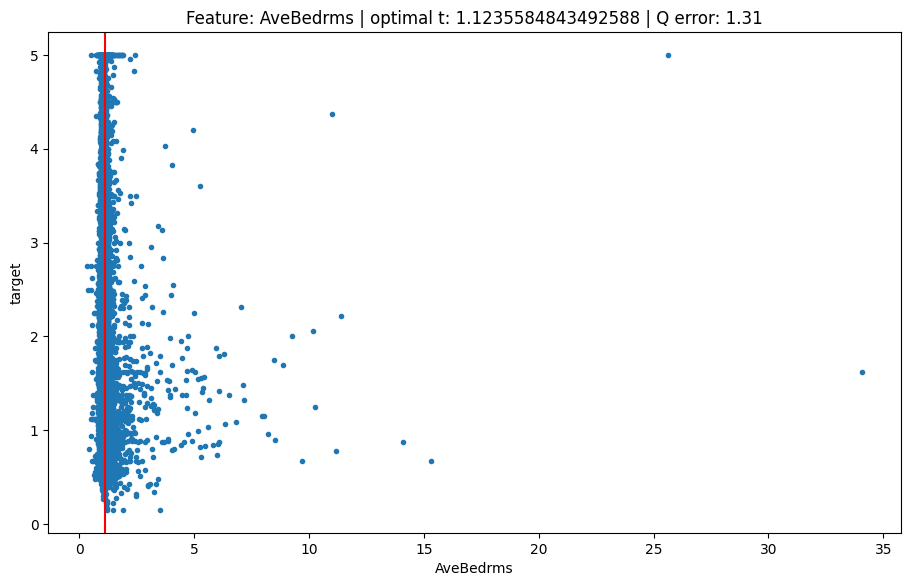

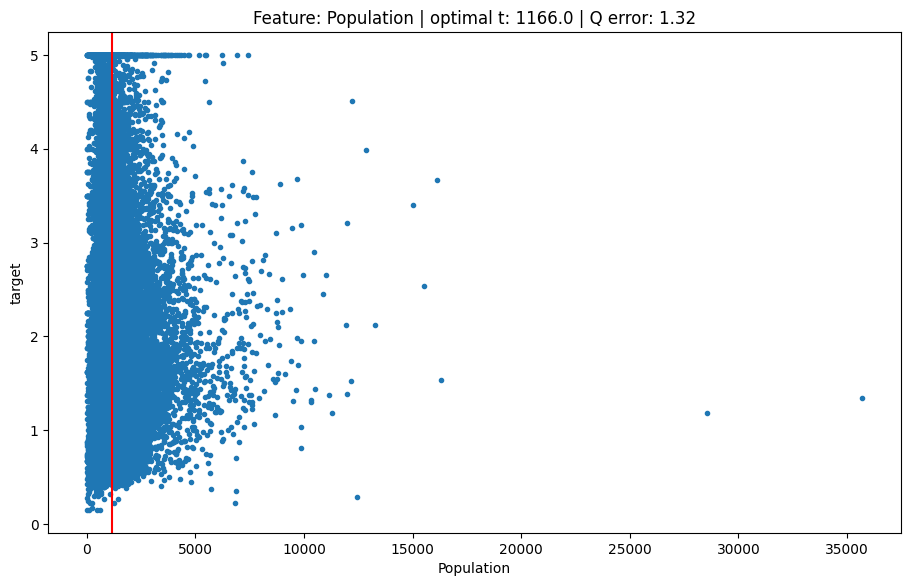

In [45]:
for result in results:
    optimal_feature, optimal_t, optimal_error = result
    plt.scatter(X[optimal_feature], y, marker='.')
    plt.axvline(x=optimal_t, color="red")
    plt.xlabel(optimal_feature)
    plt.ylabel('target')
    plt.title('Feature: {} | optimal t: {} | Q error: {:.2f}'.format(optimal_feature, optimal_t, optimal_error))
    plt.show()

## Решающее дерево: sklearn

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=13)

In [47]:
pd.DataFrame(results, columns=['feature', 'optimal t', 'min Q error'])

,feature,optimal t,min Q error
0,MedInc,5.045700,0.915364
1,AveRooms,6.374545,1.162859
2,Latitude,37.930000,1.229030
3,AveOccup,3.109181,1.251611
4,Longitude,-121.860000,1.276012
5,HouseAge,50.000000,1.294668
6,AveBedrms,1.123558,1.308770
7,Population,1166.000000,1.321564


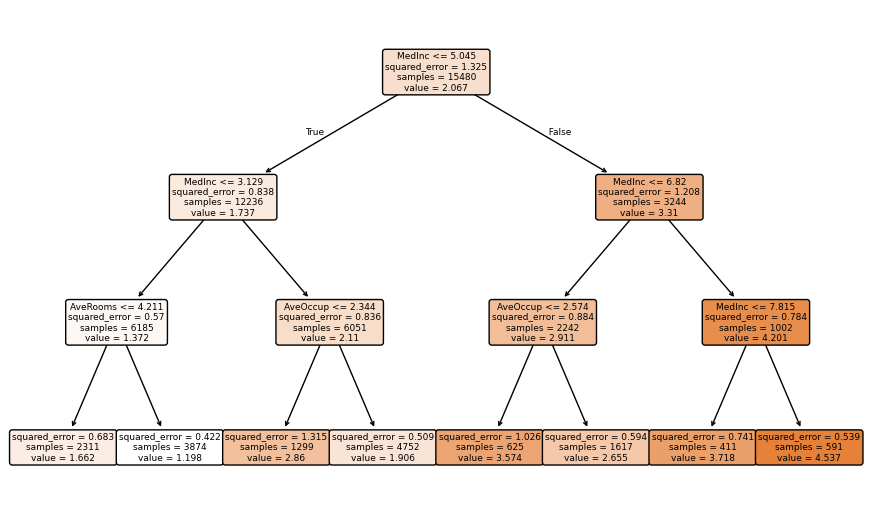

In [48]:
from sklearn.tree import plot_tree
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dt.predict(X_test))

np.float64(0.6352419064695592)

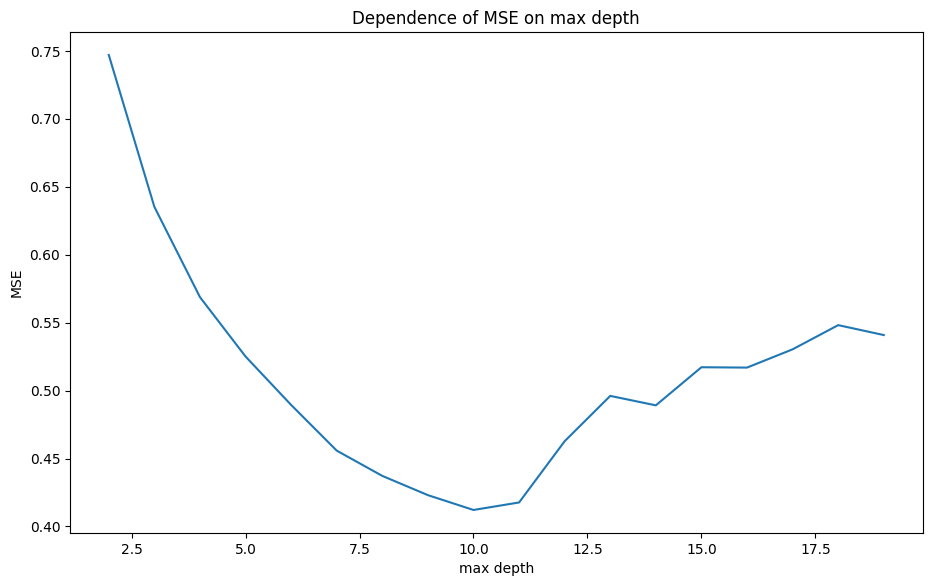

In [50]:
max_depth_array = range(2, 20)
mse_array = []
for max_depth in max_depth_array:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(max_depth_array, mse_array)
plt.title('Dependence of MSE on max depth')
plt.xlabel('max depth')
plt.ylabel('MSE')
plt.show()

In [51]:
pd.DataFrame({
    'max_depth': max_depth_array,
    'MSE': mse_array
}).sort_values(by='MSE').reset_index(drop=True)

,max_depth,MSE
0,10,0.412125
1,11,0.417647
2,9,0.423044
3,8,0.437202
4,7,0.455806
5,12,0.462736
6,14,0.489129
7,6,0.489436
8,13,0.496086
9,16,0.516918


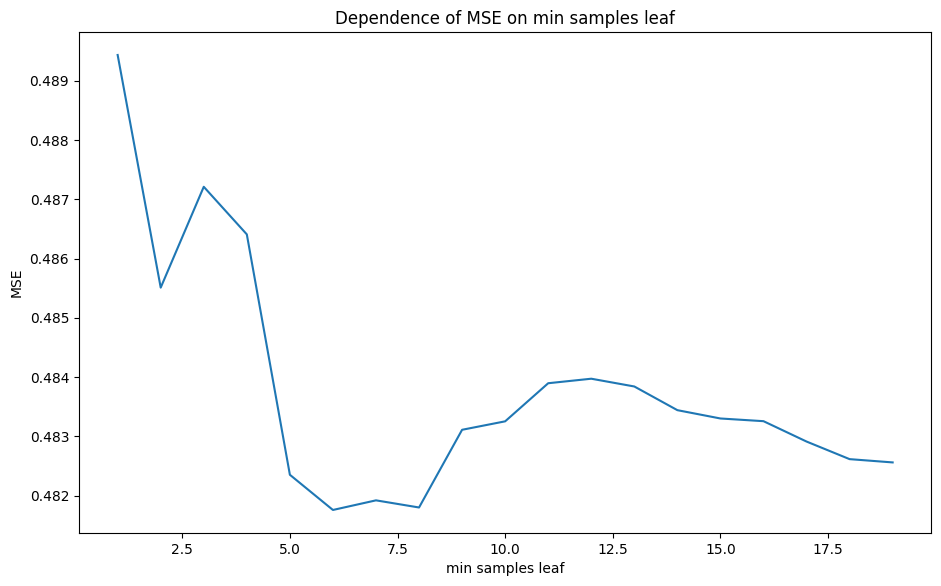

In [52]:
min_samples_leaf_array = range(1, 20)
mse_array = []
for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(min_samples_leaf_array, mse_array)
plt.title('Dependence of MSE on min samples leaf')
plt.xlabel('min samples leaf')
plt.ylabel('MSE')
plt.show()

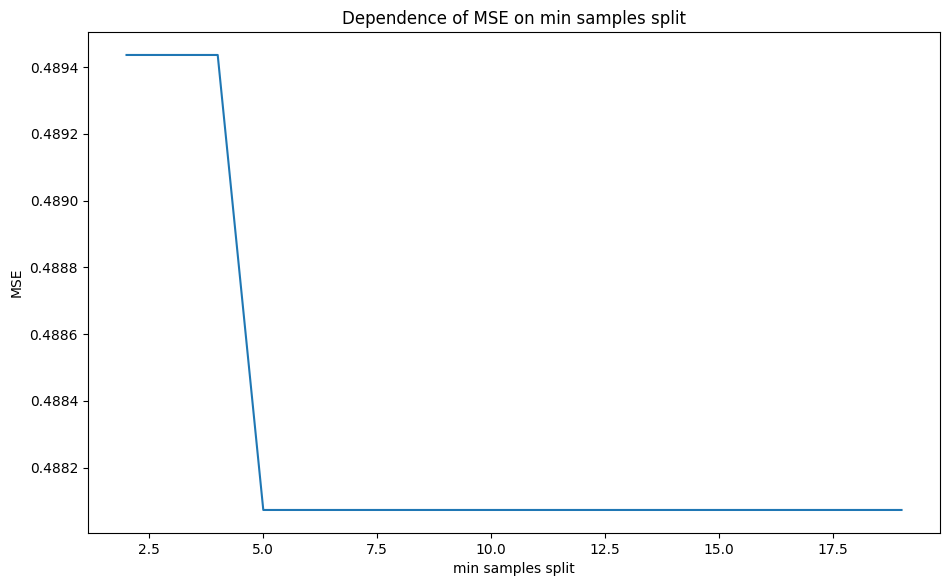

In [53]:
min_samples_split_array = range(2, 20)
mse_array = []
for min_samples_split in min_samples_split_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_split=min_samples_split, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(min_samples_split_array, mse_array)
plt.title('Dependence of MSE on min samples split')
plt.xlabel('min samples split')
plt.ylabel('MSE')
plt.show()

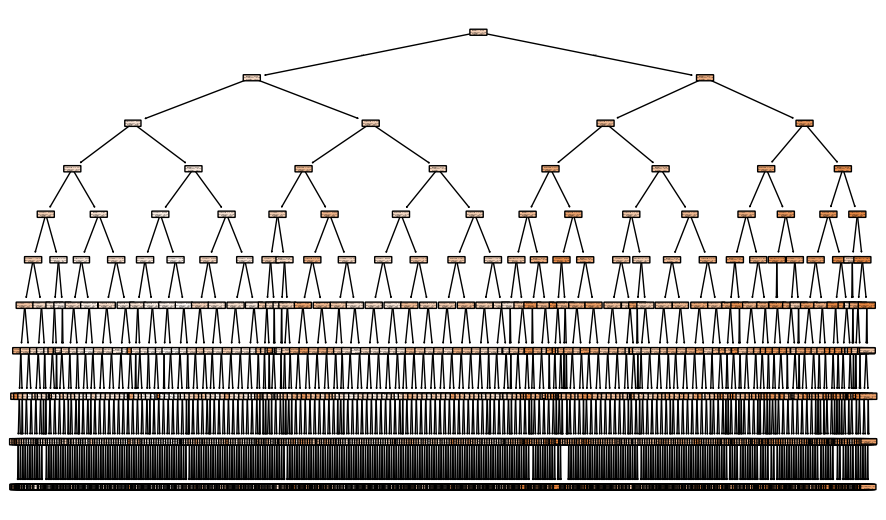

In [56]:
dt = DecisionTreeRegressor(max_depth=10, random_state=13)
dt.fit(X_train, y_train)
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [57]:
mean_squared_error(y_test, dt.predict(X_test))

np.float64(0.41212476679223164)

In [58]:
dt.feature_importances_

array([0.59585052, 0.05037403, 0.03349789, 0.01442092, 0.00988142,
       0.13529408, 0.08071239, 0.07996875])

In [61]:
pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,MedInc,0.595851
1,AveOccup,0.135294
2,Latitude,0.080712
3,Longitude,0.079969
4,HouseAge,0.050374
5,AveRooms,0.033498
6,AveBedrms,0.014421
7,Population,0.009881


Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [62]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5707,3.5174,36.0,4.547945,1.094368,1357.0,2.065449,34.21,-118.23
3754,2.9728,36.0,4.299465,0.997326,1217.0,3.254011,34.18,-118.37
11866,1.6944,11.0,21.372093,4.627907,69.0,1.604651,40.19,-121.08
19325,3.7143,49.0,6.201087,1.298913,505.0,2.744565,38.53,-122.94
1962,2.9219,17.0,6.113960,1.128205,862.0,2.455840,38.73,-120.71


In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5707,-0.181483,0.579137,-0.340021,-0.004463,-0.065383,-0.087113,-0.671762,0.675607
3754,-0.468327,0.579137,-0.436304,-0.200565,-0.187060,0.012248,-0.685728,0.605994
11866,-1.141668,-1.409735,6.179161,7.136066,-1.184805,-0.125634,2.112156,-0.741514
19325,-0.077775,1.613350,0.300554,0.408878,-0.805871,-0.030340,1.339362,-1.666371
1962,-0.495137,-0.932406,0.266794,0.063914,-0.495596,-0.054477,1.432470,-0.557537


In [64]:
# without scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test)))

0.6352419064695592
0.4894363278261739


In [65]:
# with scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test_scaled)))

0.6352419064695592
0.4894641644330499


In [71]:
import numpy as np
n = 10
g_1 = 8
g_2 = 2
prob_1 = g_1 / n
prob_2 = g_2 / n
entorpy = prob_1 * np.log2(prob_1) + prob_2 * np.log2(prob_2)
round(-1 * entorpy,2)

np.float64(0.72)